Deep Learning is sometimes called end-to-end machine learning <br>
from original data to target output

In [1]:
import numpy as np
# mean squared error
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(mean_squared_error(np.array(y1), np.array(t)))
print(mean_squared_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


In [2]:
# cross entropy error   y more, error less
def cross_entroy_error(y, t):
    delta = 1e-7       # delta is used to prevent infinity and overflow
    return -np.sum(t * np.log(y + delta))

y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(cross_entroy_error(np.array(y1), np.array(t)))
print(cross_entroy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


In [3]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [4]:
   # randomly pick out 100 data
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch.shape)
print(t_batch.shape)

(10, 784)
(10, 10)


In [5]:
# mini-batch  cross entropy error
def cross_entroy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [6]:
# numerical differentiation
# a shabby version
def numerical_diff(f, x):
    h = 10e-50          # exsiting rounding error
    return (f(x+h) - f(x)) / h

# a better version
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

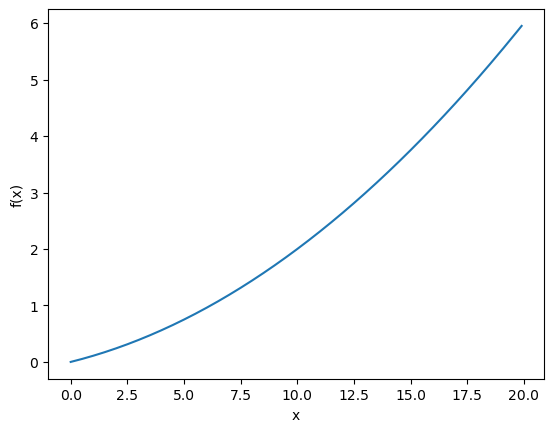

In [7]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

import matplotlib.pylab as plt
%matplotlib inline
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

In [8]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


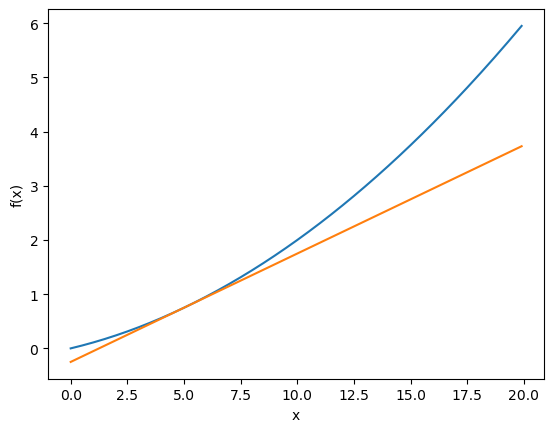

In [9]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

tf = tangent_line(function_1, 5)
y2 = tf(x)
plt.plot(x, y2)

In [10]:
# gradient

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] =  tmp_val

    return grad

def function_2(x):
    return np.sum(x**2)

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [11]:
def numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] =  tmp_val

    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_no_batch(f, x)

    return grad

In [12]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
    
print(function_2(np.array([1,2])))
print(function_2(np.array([[1,1], [1,2]])))

5
[2 5]


Text(0.5, 0, 'Z axis')

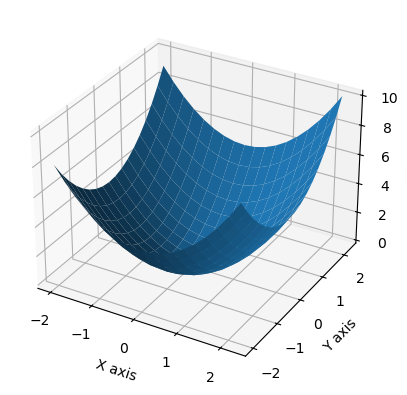

In [13]:
from mpl_toolkits.mplot3d import Axes3D
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
Z = X**2 + Y**2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, edgecolor='none')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


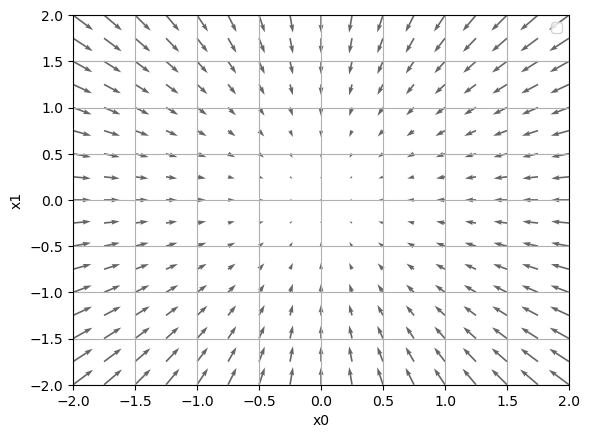

In [14]:

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()
    
grad = numerical_gradient(function_2, np.array([X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()


above shows the negative gradient of vectors

In [15]:
# realize the gradient_descent method
def gradient_descend(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    
    return x

In [16]:
init_x = np.array([-3.0, 4.0])
gradient_descend(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [17]:
# what if the learing rate is either too high or too low
init_x = np.array([-3.0, 4.0])
print(gradient_descend(function_2, init_x=init_x, lr=10.0, step_num=100))
init_x = np.array([-3.0, 4.0])
print(gradient_descend(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [18]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # intilize by Gaussian Distribution

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


In [19]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[[-2.42111903  0.15246102  2.05916284]
 [ 1.28789195  0.92043046  1.35297748]]
[-0.29356866  0.91986403  2.45317744]


In [20]:
np.argmax(p)

2

In [21]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.2468252610492477

In [22]:
def f(W):
    return net.loss(x, t)

dw = numerical_gradient(f, net.W)
print(dw)

[[ 0.03006489  0.10116883 -0.13123372]
 [ 0.04509733  0.15175325 -0.19685058]]


### realise the learning algorithm

In [23]:
# build a 2-layer NN
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y
    
    # x: input, t: tag(supervision data)
    # use cross entropy error as loss function
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t) / float(x.shape[0])

        return accuracy
    
    # def gradient(self, x, t):
    #     loss_W = lambda W: self.loss(x, t)

    #     grads = {}
    #     grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    #     grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    #     grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    #     grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    #     return grads        
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [27]:
from tqdm import tqdm
import time
pbar = tqdm(total=100)

from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# repeat in each epoch
iter_per_epoch = max(train_size / batch_size, 1)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # calculate gradients
    grad = network.gradient(x_batch, t_batch)

    # update params
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= lr * grad[key]

    # record loss
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    pbar.update(0.01)

    # calculate the accuracy
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
pbar.close()

  2%|▏         | 2.249999999999996/100 [00:00<00:19,  5.01it/s] 

train acc, test acc | 0.0987, 0.098


  7%|▋         | 7.339999999999888/100 [00:01<00:15,  5.82it/s] 

train acc, test acc | 0.7905166666666666, 0.7942


 14%|█▍        | 14.389999999999738/100 [00:02<00:11,  7.22it/s]

train acc, test acc | 0.8761666666666666, 0.8791


 20%|██        | 20.260000000000367/100 [00:03<00:11,  6.88it/s]

train acc, test acc | 0.8984, 0.9026


 26%|██▋       | 26.430000000001332/100 [00:03<00:09,  7.95it/s]

train acc, test acc | 0.9074333333333333, 0.9122


 33%|███▎      | 32.68000000000207/100 [00:04<00:08,  8.41it/s] 

train acc, test acc | 0.9132333333333333, 0.9158


 37%|███▋      | 37.39000000000113/100 [00:05<00:09,  6.94it/s]

train acc, test acc | 0.9190833333333334, 0.9219


 44%|████▎     | 43.5599999999999/100 [00:06<00:07,  7.25it/s] 

train acc, test acc | 0.9233166666666667, 0.9239


 50%|████▉     | 49.579999999998705/100 [00:06<00:07,  7.03it/s]

train acc, test acc | 0.9267166666666666, 0.9284


 55%|█████▌    | 55.49999999999753/100 [00:07<00:06,  6.83it/s] 

train acc, test acc | 0.9305833333333333, 0.9327


 62%|██████▏   | 62.48999999999614/100 [00:08<00:04,  7.91it/s]

train acc, test acc | 0.9340333333333334, 0.9335


 67%|██████▋   | 67.13999999999744/100 [00:09<00:04,  6.89it/s]

train acc, test acc | 0.9365, 0.9358


 75%|███████▍  | 74.55000000000123/100 [00:10<00:03,  8.17it/s]

train acc, test acc | 0.93965, 0.9388


 80%|████████  | 80.40000000000423/100 [00:10<00:02,  7.86it/s]

train acc, test acc | 0.9415666666666667, 0.941


 87%|████████▋ | 86.55000000000737/100 [00:11<00:01,  7.93it/s]

train acc, test acc | 0.9427666666666666, 0.941


 93%|█████████▎| 92.61000000001047/100 [00:12<00:00,  7.99it/s]

train acc, test acc | 0.9455666666666667, 0.9438


 97%|█████████▋| 97.41000000001293/100 [00:13<00:00,  7.01it/s]

train acc, test acc | 0.94715, 0.9464


100%|█████████▉| 99.65000000001407/100 [00:13<00:00,  8.59it/s]d:\Program_files\Anaconda\Lib\site-packages\tqdm\std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 100.00000000001425/100 [00:13<00:00,  7.44it/s]


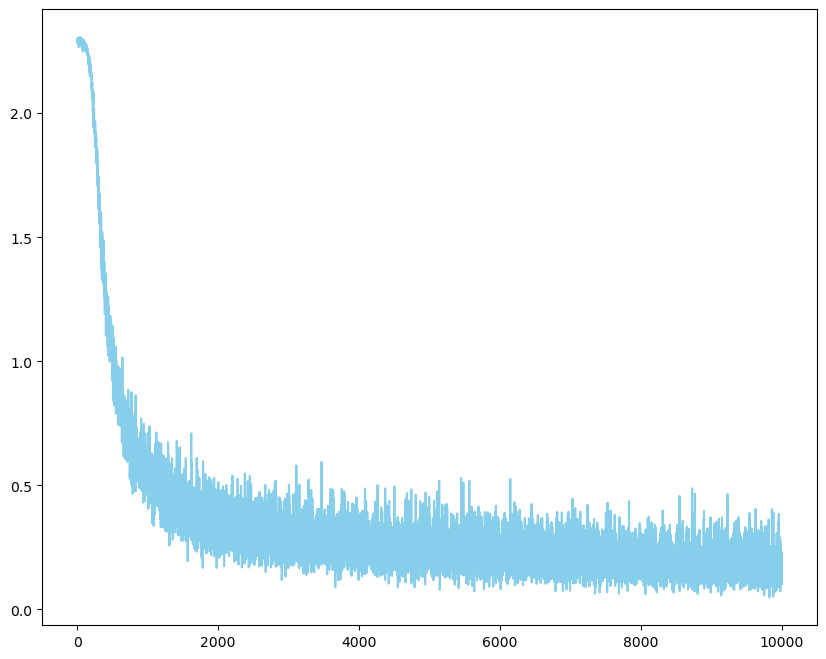

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
iteration = [i for i in range(iters_num)]
plt.plot(iteration, train_loss_list, color='skyblue')

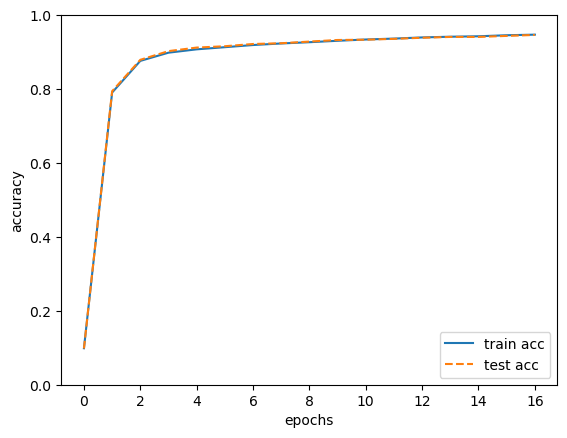

In [29]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()